# Using Python and PySD librsary to conduct sensitivy analysis in Vensim

## Install the packages

In [ ]:
!pip install pysd
!pip install netCDF4

## Load the libraries

In [28]:
import os
import pysd
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Set the working directory

In [29]:
os.chdir("C:/Users/rss188/Desktop/Chicken model/SFD chicken model")
os.getcwd()

'C:\\Users\\rss188\\Desktop\\Chicken model\\SFD chicken model'

## Read the original model and print the results

In [30]:
model= pysd.read_vensim("C:/Users/rss188/Desktop/Chicken model/SFD chicken model/SFD chicken model V2.mdl")

results = model.run()

print(results.head())
print(results.tail())

   FINAL TIME  INITIAL TIME  SAVEPER  TIME STEP  Births  Chickens  \
0          50             0        1          1   200.0    1000.0   
1          50             0        1          1   200.0    1000.0   
2          50             0        1          1   200.0    1000.0   
3          50             0        1          1   200.0    1000.0   
4          50             0        1          1   200.0    1000.0   

   Cross roading  Death risk  Deaths  Egg production    Eggs  \
0            1.0         0.2   200.0           200.0  1000.0   
1            1.0         0.2   200.0           200.0  1000.0   
2            1.0         0.2   200.0           200.0  1000.0   
3            1.0         0.2   200.0           200.0  1000.0   
4            1.0         0.2   200.0           200.0  1000.0   

   Fertility effect  Incubation time  Initial chicken population  \
0               0.2                5                        1000   
1               0.2                5                        1000

## Set new conditions and print the results


In [31]:
model= pysd.read_vensim("C:/Users/rss188/Desktop/Chicken model/SFD chicken model/SFD chicken model V2.mdl")

params = {'Normal fertility rate': 0.3, 'Normal death risk': 0.2}
return_columns = ['Eggs', 'Chickens', 'Egg production', 'Births', 'Deaths']
return_timestamps = range(51)

results = model.run(params=params, return_columns=return_columns, return_timestamps=return_timestamps, initial_condition='current')

print(results.head())
print(results.tail())

     Eggs     Chickens  Egg production  Births      Deaths
0  1000.0  1000.000000           300.0  200.00  200.000000
1  1100.0  1000.000000           300.0  220.00  200.000000
2  1180.0  1020.000000           300.0  236.00  208.080000
3  1244.0  1047.920000           300.0  248.80  219.627265
4  1295.2  1077.092735           300.0  259.04  232.025752
           Eggs     Chickens  Egg production      Births      Deaths
46  1499.982578  1224.732851           300.0  299.996516  299.994111
47  1499.986062  1224.735255           300.0  299.997212  299.995289
48  1499.988850  1224.737179           300.0  299.997770  299.996231
49  1499.991080  1224.738717           300.0  299.998216  299.996985
50  1499.992864  1224.739948           300.0  299.998573  299.997588


## Plot the results from the new conditions

<Axes: >

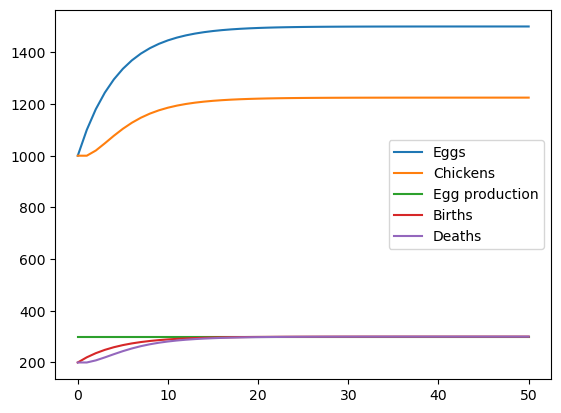

In [32]:
results.plot()

## First sensitivy analysis (Normal fertility rate)

In [33]:
Fertility_Rate_Values = np.linspace(start=0.2, stop=1, num=5)

results = pd.DataFrame()

for rate in Fertility_Rate_Values:
    
    single_run_result = model.run(params={'Normal Fertility Rate': rate})
    
    results[str(round(rate, 2))] = single_run_result['Chickens']

print(results.head())

      0.2          0.4          0.6          0.8          1.0
0  1000.0  1000.000000  1000.000000  1000.000000  1000.000000
1  1000.0  1000.000000  1000.000000  1000.000000  1000.000000
2  1000.0  1040.000000  1080.000000  1120.000000  1160.000000
3  1000.0  1095.680000  1190.720000  1285.120000  1378.880000
4  1000.0  1153.177068  1302.357176  1447.613317  1589.017989


## Plot the results from the first sensitivity analysis

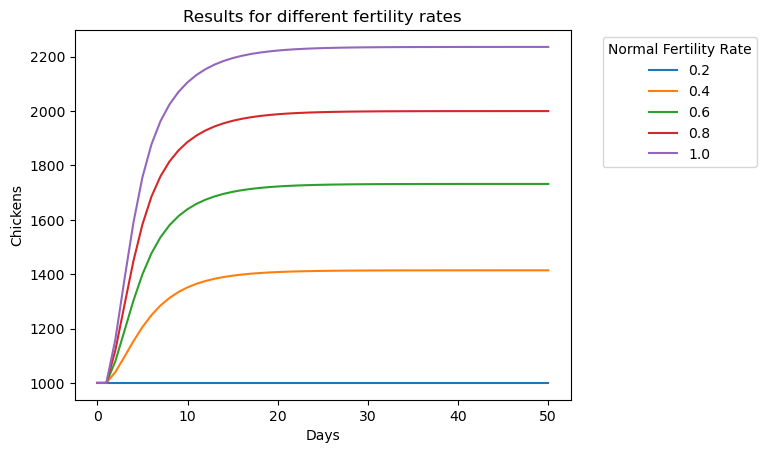

In [34]:
results.plot()
plt.xlabel('Days')
plt.ylabel('Chickens')
plt.title('Results for different fertility rates')
plt.legend(title='Normal Fertility Rate', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Second sensitivy analysis (Normal fertility rate and Normal death risk)

In [35]:
Fertility_Rate_Values = np.linspace(start=0.02, stop=1, num=5)
Death_Risk_Values = np.linspace(start=0.02, stop=1, num=5)


parameter_combinations = list(itertools.product(Fertility_Rate_Values, Death_Risk_Values))

results_list = []
run_number = 1  # Initialize run number

for Fertility_Rate, Death_Risk in parameter_combinations:
    
    single_run_result = model.run(params={'Normal Fertility Rate': Fertility_Rate, 'Normal Death Risk': Death_Risk})
    
    # Store only necessary data with run number
    
    results_list.append({
        'Run Number': f'Run {run_number}',
        'Normal Fertility Rate': Fertility_Rate, 
        'Normal Death Risk': Death_Risk, 
        'Eggs': single_run_result['Eggs'],
        'Chickens': single_run_result['Chickens']
    })

    run_number += 1  # Increment run number for each iteration
    del single_run_result #delete variables that are no longer needed to free up memory


results = pd.DataFrame(results_list)

csv_file_path = r'C:/Users/rss188/Desktop/Chicken model/SFD chicken model/model_results.csv'
results.to_csv(csv_file_path, index=False)

print(results.head())

  Run Number  Normal Fertility Rate  Normal Death Risk  \
0      Run 1                   0.02              0.020   
1      Run 2                   0.02              0.265   
2      Run 3                   0.02              0.510   
3      Run 4                   0.02              0.755   
4      Run 5                   0.02              1.000   

                                                Eggs  \
0  0     1000.000000
1      820.000000
2      676...   
1  0     1000.000000
1      820.000000
2      676...   
2  0     1000.000000
1      820.000000
2      676...   
3  0     1000.000000
1      820.000000
2      676...   
4  0     1000.000000
1      820.000000
2      676...   

                                            Chickens  
0  0     1000.000000
1     1180.000000
2     1316...  
1  0     1000.000000
1      935.000000
2      867...  
2  0     1000.000000
1      690.000000
2      611...  
3  0     1000.000000
1      445.000000
2      459...  
4  0     1000.000000
1      200.000000


## Plot the results from the second sensitivity analysis

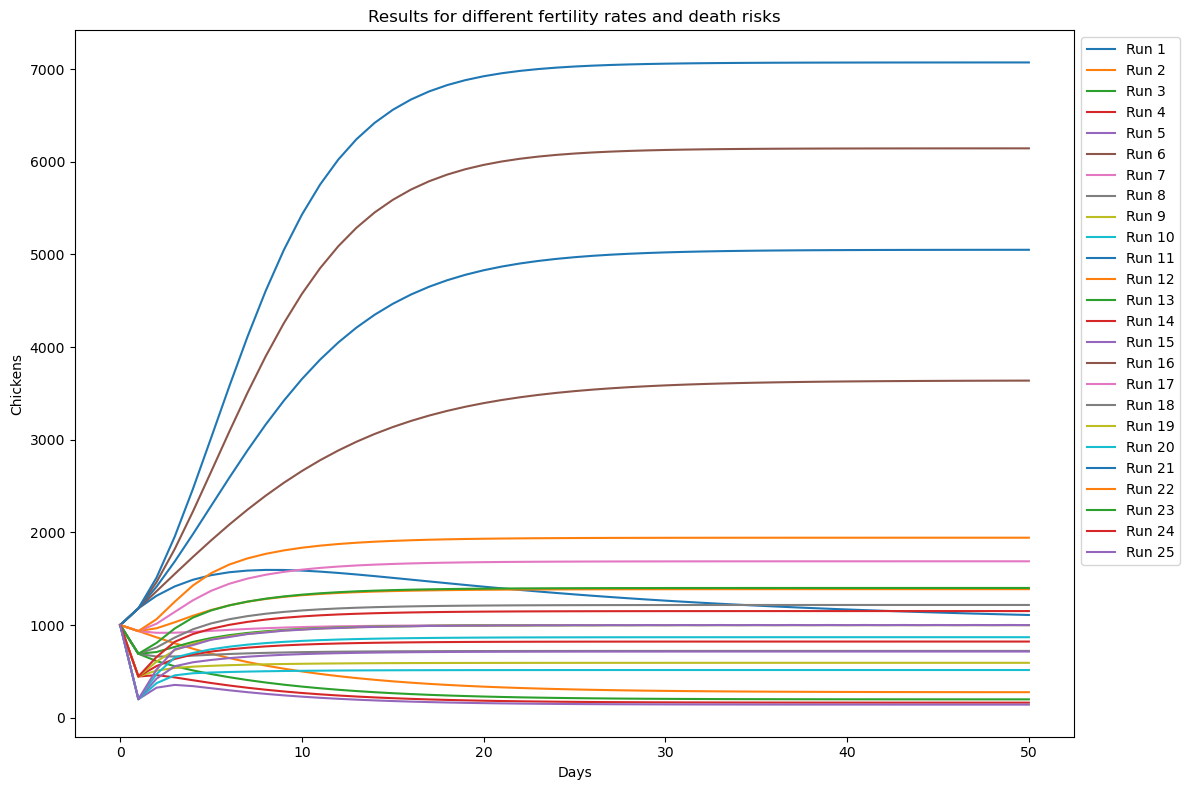

In [36]:
plt.figure(figsize=(12, 8))

for index, row in results.iterrows():
    plt.plot(row['Chickens'], label=row['Run Number'])

plt.xlabel('Days')
plt.ylabel('Chickens')
plt.title('Results for different fertility rates and death risks')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## Third sensitivy analysis (Normal fertility rate, Normal death risk, Max chicken capacity)

In [37]:
Fertility_Rate_Values = np.linspace(start=0.02, stop=1, num=5)
Death_Risk_Values = np.linspace(start=0.02, stop=1, num=5)
Chicken_Capacity_Values= np.linspace(start=1000, stop=2000, num=5)


parameter_combinations = list(itertools.product(Fertility_Rate_Values, Death_Risk_Values, Chicken_Capacity_Values ))

results_list = []
run_number = 1  # Initialize run number

for Fertility_Rate, Death_Risk, Chicken_Capacity in parameter_combinations:
    
    single_run_result = model.run(params={'Normal Fertility Rate': Fertility_Rate, 'Normal Death Risk': Death_Risk, 'Max chicken capacity': Chicken_Capacity}, return_timestamps= range(51))
    
    # Store only necessary data with run number
    
    results_list.append({
        'Run Number': f'Run {run_number}',
        'Normal Fertility Rate': Fertility_Rate, 
        'Normal Death Risk': Death_Risk,
        'Max chicken capacity': Chicken_Capacity,
        'Eggs': single_run_result['Eggs'],
        'Chickens': single_run_result['Chickens']
    })

    run_number += 1  # Increment run number for each iteration
    del single_run_result #delete variables that are no longer needed to free up memory


results = pd.DataFrame(results_list)

csv_file_path = r'C:/Users/rss188/Desktop/Chicken model/SFD chicken model/model_results.csv'
results.to_csv(csv_file_path, index=False)

print(results.head())

  Run Number  Normal Fertility Rate  Normal Death Risk  Max chicken capacity  \
0      Run 1                   0.02               0.02                1000.0   
1      Run 2                   0.02               0.02                1250.0   
2      Run 3                   0.02               0.02                1500.0   
3      Run 4                   0.02               0.02                1750.0   
4      Run 5                   0.02               0.02                2000.0   

                                                Eggs  \
0  0     1000.000000
1      820.000000
2      676...   
1  0     1000.000000
1      825.000000
2      685...   
2  0     1000.000000
1      830.000000
2      694...   
3  0     1000.000000
1      835.000000
2      703...   
4  0     1000.000000
1      840.000000
2      712...   

                                            Chickens  
0  0     1000.000000
1     1180.000000
2     1316...  
1  0     1000.000000
1     1184.000000
2     1326...  
2  0     1000.000

## Plot the results from the third sensitivity analysis

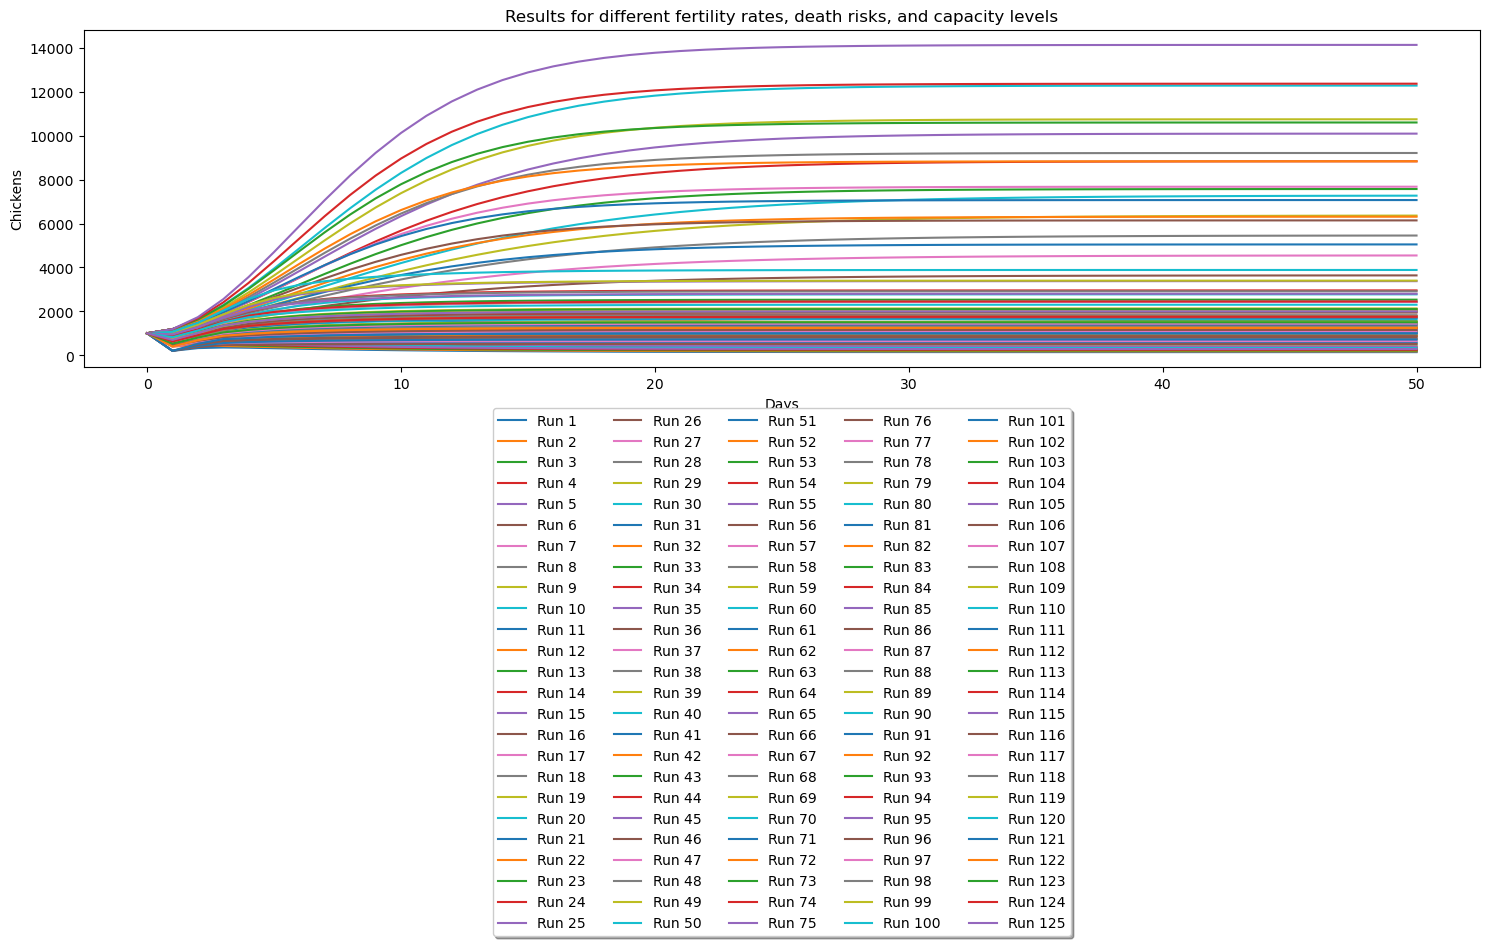

In [38]:
plt.figure(figsize=(15, 10))

for index, row in results.iterrows():
    plt.plot(row['Chickens'], label=row['Run Number'])

plt.xlabel('Days')
plt.ylabel('Chickens')
plt.title('Results for different fertility rates, death risks, and capacity levels')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.show()

## Fourth sensitivy analysis (Normal fertility rate, Normal death risk, Max chicken capacity, Initial number of eggs, Initial number of chickens)

In [39]:
Fertility_Rate_Values = np.linspace(start=0.02, stop=1, num=3)
Death_Risk_Values = np.linspace(start=0.02, stop=1, num=3)
Chicken_Capacity_Values= np.linspace(start=1000, stop=2000, num=3)
Initial_Eggs_Values= np.linspace(start=500, stop=1100, num=3)
Initial_Chickens_Values= np.linspace(start=500, stop=1100, num=3)


parameter_combinations = list(itertools.product(Fertility_Rate_Values, Death_Risk_Values, Chicken_Capacity_Values, Initial_Eggs_Values, Initial_Chickens_Values))

results_list = []
run_number = 1  # Initialize run number

for Fertility_Rate, Death_Risk, Chicken_Capacity, Initial_Eggs, Initial_Chickens in parameter_combinations:
    
    single_run_result = model.run(params={'Normal Fertility Rate': Fertility_Rate, 'Normal Death Risk': Death_Risk, 'Max chicken capacity': Chicken_Capacity, 'Initial number of eggs':Initial_Eggs, 'Initial chicken population':Initial_Chickens}, return_timestamps= range(51))
    
    # Store only necessary data with run number
    
    results_list.append({
        'Run Number': f'Run {run_number}',
        'Normal Fertility Rate': Fertility_Rate, 
        'Normal Death Risk': Death_Risk,
        'Max chicken capacity': Chicken_Capacity,
        'Initial number of eggs': Initial_Eggs,
        'Initial chicken population': Initial_Chickens,
        'Eggs': single_run_result['Eggs'],
        'Chickens': single_run_result['Chickens']
    })

    run_number += 1  # Increment run number for each iteration
    del single_run_result #delete variables that are no longer needed to free up memory


results = pd.DataFrame(results_list)

csv_file_path = r'C:/Users/rss188/Desktop/Chicken model/SFD chicken model/model_results.csv'
results.to_csv(csv_file_path, index=False)

print(results.head())

  Run Number  Normal Fertility Rate  Normal Death Risk  Max chicken capacity  \
0      Run 1                   0.02               0.02                1000.0   
1      Run 2                   0.02               0.02                1000.0   
2      Run 3                   0.02               0.02                1000.0   
3      Run 4                   0.02               0.02                1000.0   
4      Run 5                   0.02               0.02                1000.0   

   Initial number of eggs  Initial chicken population  \
0                   500.0                       500.0   
1                   500.0                       800.0   
2                   500.0                      1100.0   
3                   800.0                       500.0   
4                   800.0                       800.0   

                                                Eggs  \
0  0     500.000000
1     420.000000
2     356.00...   
1  0     500.000000
1     420.000000
2     356.00...   
2  0    

## Plot the results from the fourth sensitivity analysis

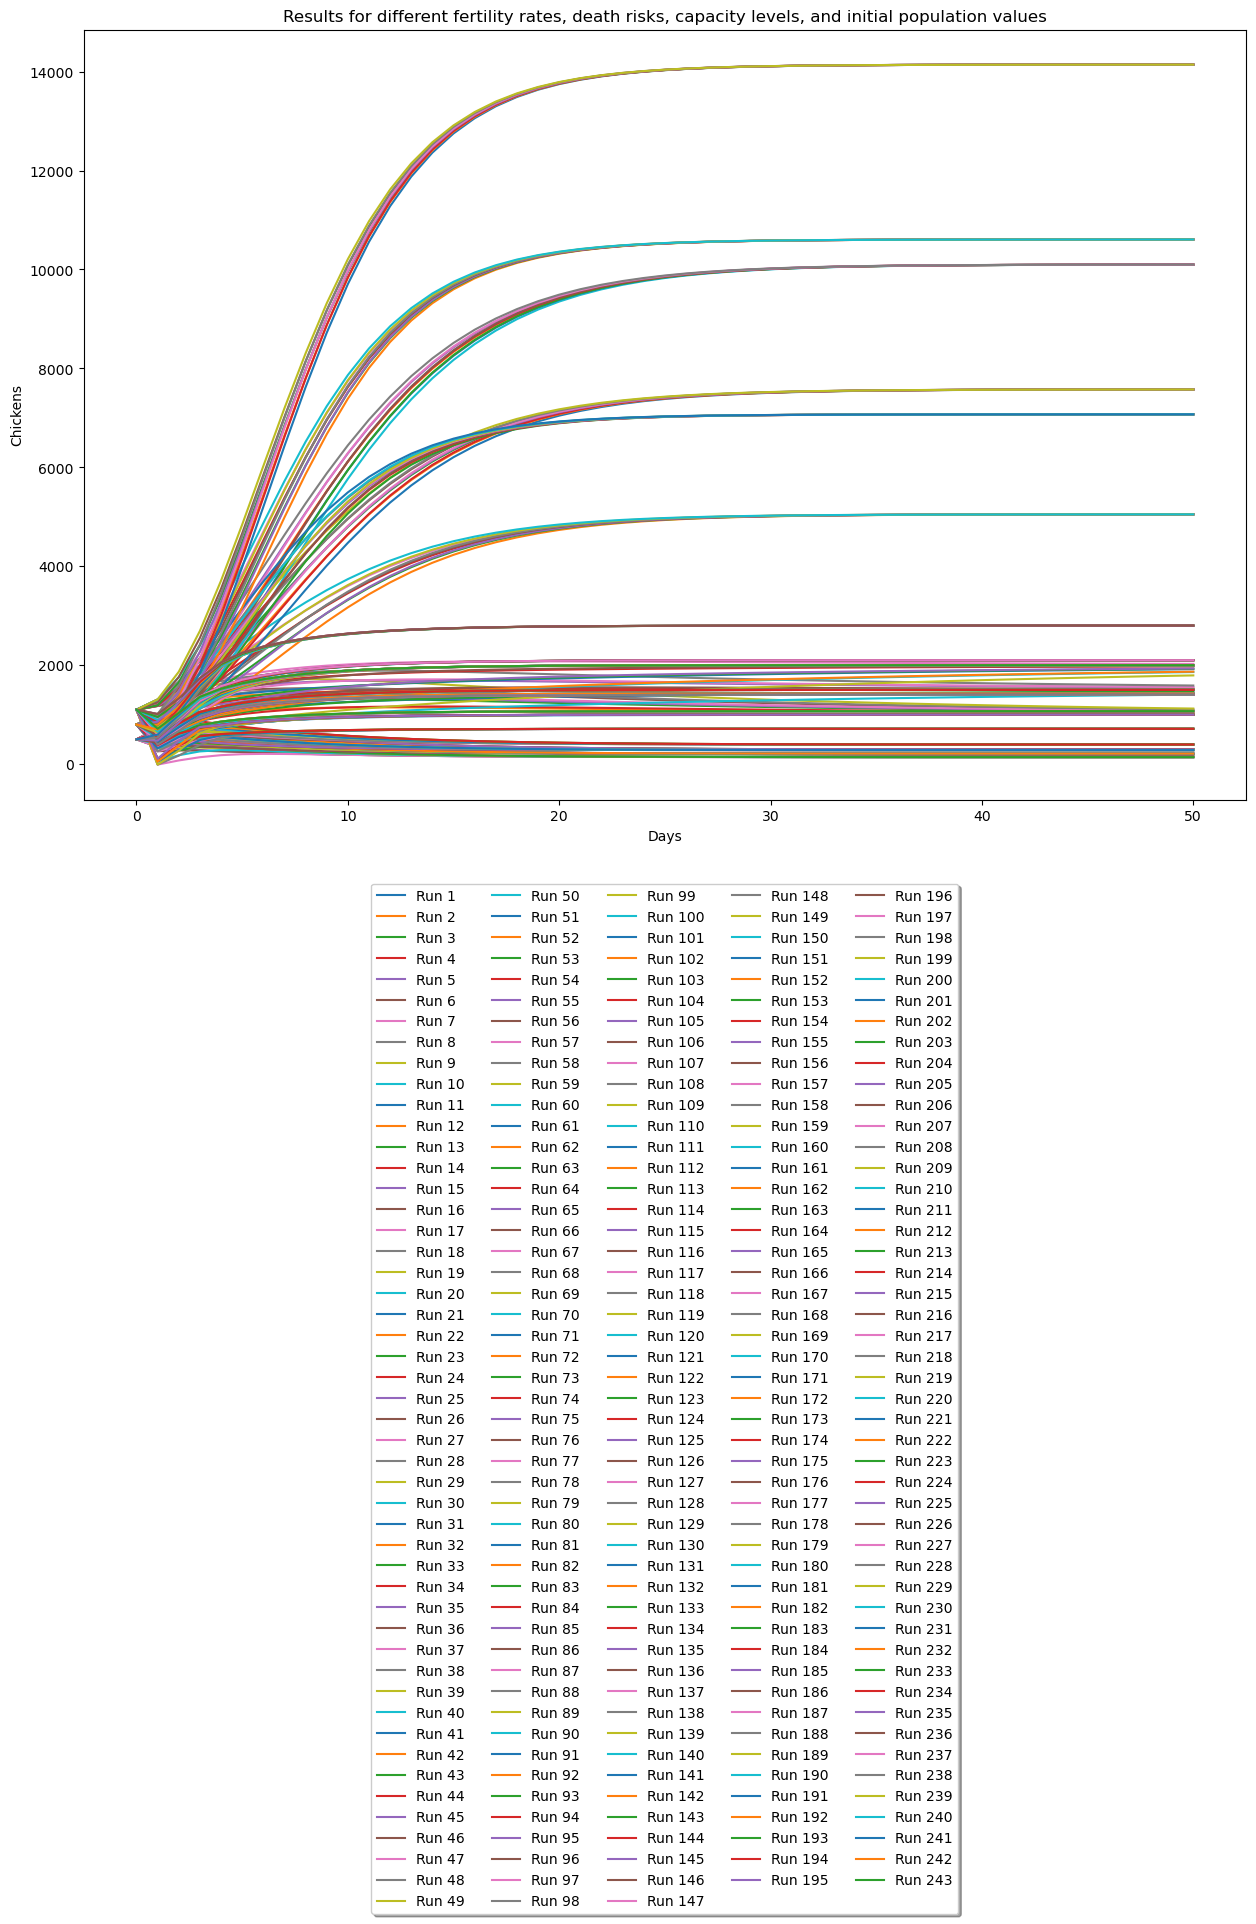

In [40]:
plt.figure(figsize=(15, 10))

for index, row in results.iterrows():
    plt.plot(row['Chickens'], label=row['Run Number'])

plt.xlabel('Days')
plt.ylabel('Chickens')
plt.title('Results for different fertility rates, death risks, capacity levels, and initial population values')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)
plt.show()